In [1]:
from os import path

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii
from astropy.io import fits
from astropy.wcs import WCS
import reproject

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

from pyia import GaiaData
import gala.dynamics as gd
import gala.coordinates as gc
import gala.potential as gp
from gala.mpl_style import center_emph, center_deemph

from helpers import get_ext

/Users/adrian/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [22]:
lf = ascii.read('../data/lf_FeH-0.75_age100Myr.txt', header_start=13)

In [24]:
dm = coord.Distance(30*u.kpc).distmod.value

In [44]:
lf[(lf['bin(mag)'] + dm) < 14]

age/yr,bin(mag),mbol,gP1,rP1,iP1,zP1,yP1,wP1
float64,float64,float64,float64,float64,float64,float64,float64,float64
100000000.0,19.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000.0,19.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
coord.Distance(100*u.pc).distmod.value + -4

1.0

(14, 24)

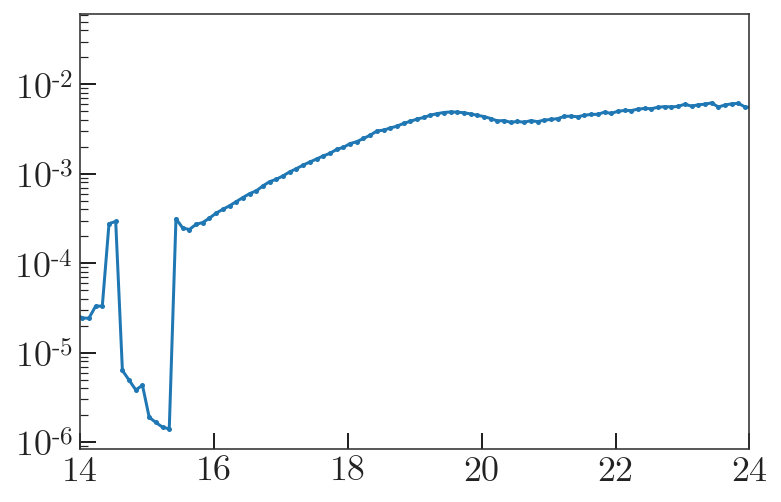

In [28]:
fig, ax = plt.subplots(1, 1)

ax.plot(lf['bin(mag)'] + dm, lf['gP1'])
ax.set_yscale('log')
ax.set_xlim(14, 24)

In [57]:
g0 = lf['bin(mag)'] + dm
dN = lf['gP1']

In [73]:
new_bin_size = 0.5
old_bin_sze = 0.1

bins = np.arange(16, 19+1e-3, new_bin_size)
new_Phi = []
for l, r in zip(bins[:-1], bins[1:]):
    bin_mask = (g0 >= l) & (g0 < r)
    new_Phi.append((dN[bin_mask] * old_bin_sze).sum() / new_bin_size)

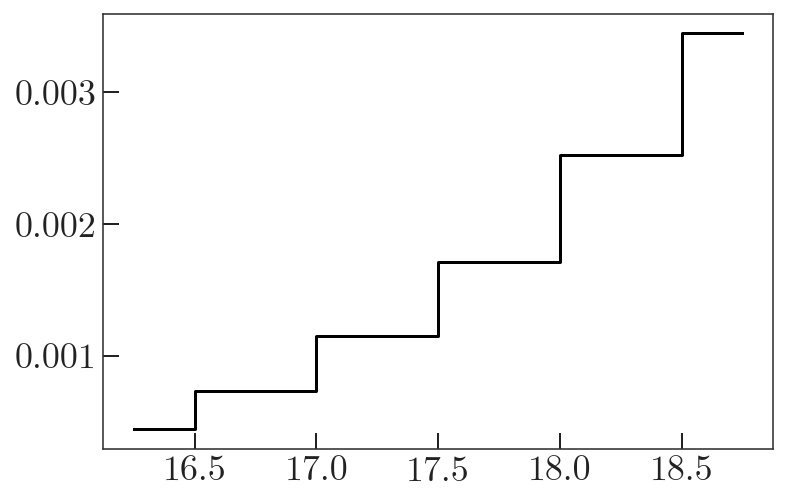

In [74]:
bin_m = (bins[:-1] + bins[1:]) / 2.

plt.plot(bin_m, new_Phi, drawstyle='steps-mid', marker='', color='k')
# plt.ylim(0, 20)

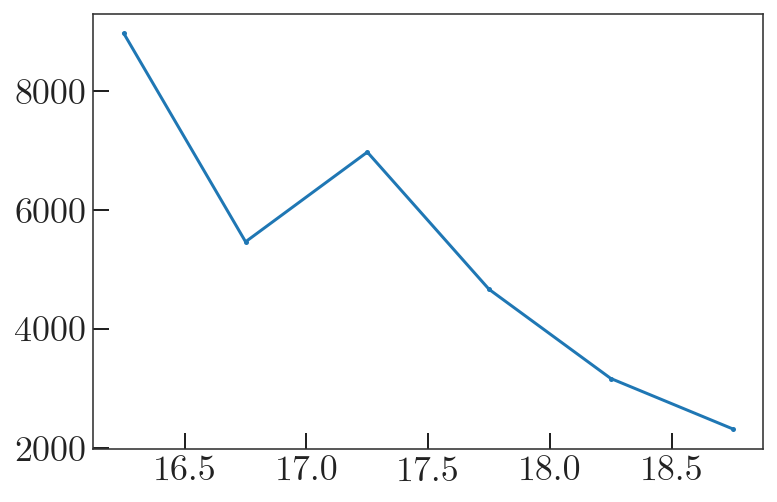

In [77]:
meas_N = np.array([4, 4, 8, 8, 8, 8])
plt.plot(bin_m, meas_N / new_Phi)